# ML Andrew Ng course 
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import time
import random
from PIL import Image

One of the best solutions I found to read .mat files was scipy.io.loadmat. So, that is what I used.

In [2]:
import scipy.io as scp

## Ex 3 Part 1 Logistic Regression: One vs All

In [151]:
mat=scp.loadmat("ml coursera/ex3data1.mat")

In [152]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

We need X and y

In [153]:
X=mat["X"]
y=mat["y"]

In [154]:
X.shape  #2000 images 20x20 px

(5000, 400)

In [155]:
y.shape

(5000, 1)

Lets see smaple images from the dataset.

0 is labeled as 10. We can fix that easily.

In [156]:
y = np.array([[0] if i==10 else i for i in list(y)])

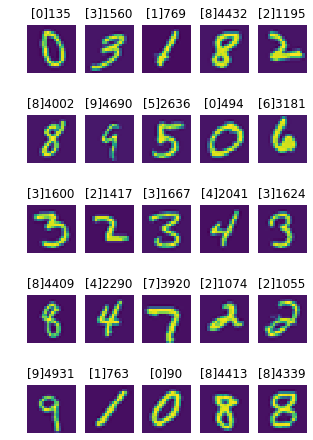

In [157]:
fig, ax = plt.subplots(5, 5, figsize=(5,8), squeeze=False)
for i in range(5):
    for j in range(5):
        k = random.randint(0, 5001)
        ax[i][j].matshow(X[k].reshape((20,20)).transpose())
        ax[i][j].set_title((''+str(y[k])+str(k)))
        ax[i][j].axis("off")

#### Matrices

In [158]:
m = len(X)
n = len(X[0]) +1
X = np.hstack((np.ones((m,1)),X))   #adding the bias x0
X.shape

(5000, 401)

In [159]:
y.shape

(5000, 1)

In [160]:
theta = np.matrix(np.zeros((n, 1)))
theta.shape

(401, 1)

### Algorithm

Remember we already used dot products, i.e. vectorized our functions. So, we don't have to do that again. Instead, we can use same functions.

In [161]:
def logistic(z):
    sig = 1/(1 + np.exp(-z))
    #sig[sig==1] = np.nextafter(1,0) 
    return sig

def predict(x, theta):
    return logistic(x.dot(theta))

In [162]:
ih = predict(X, theta)

##### Simple Logistic Regression

In [163]:
def updateThetaMatrix(x, y, h, theta, alpha):
    dj = 1/m * x.T.dot((h-y))
    return theta - (alpha * dj)

def gradientDescent(x, y, n, theta, alpha):
    j = []
    thetaValues = []
    for i in range(n):
        h = predict(x, theta)
        j.append(calcCost(h, y))
        if np.isnan(j[-1]): print(h[:2][:],j[-1],theta)
        theta = updateThetaMatrix(x, y, h, theta, alpha)
        thetaValues.append(theta.A1.tolist())
    return j, thetaValues

def calcCost(h, y):
    error = (-y.T.dot(np.log(h)) - ((1-y).T.dot(np.log(1-h))))
    return sum(error).item(0)/m

Initial Cost

In [164]:
calcCost(ih, y)

0.6931471805599413

##### Regularized Logistic Regression

In [165]:
def updateThetaMatrixRegular(x, h, y, theta, alpha, lamda):
    dj = 1/m * x.T.dot((h-y))
    dj += (lamda/m) * theta
    return theta - (alpha * dj)

def gradientDescentRegular(x, y, n, theta, alpha, lamda): #as lambda is a keyword
    j = []
    thetaValues = []
    for i in range(n):
        h = predict(x, theta)
        j.append(calcCostRegular(h, y, theta, lamda))
        if np.isnan(j[-1]): print(h[:2][:],j[-1],theta)
        theta = updateThetaMatrixRegular(x, h, y, theta, alpha, lamda)
        thetaValues.append(theta.A1.tolist())
    return j, thetaValues

def calcCostRegular(h, y, theta, lamda):
    error = (-y.T.dot(np.log(h)) - ((1-y).T.dot(np.log(1-h))))
    error += (lamda/(2*m))*sum(np.square(theta))  #Not regularizing theta0 makes a very small difference. So regularizing all
    return sum(error).item(0)/m

Initial Cost

In [166]:
calcCostRegular(ih, y, theta, 1)

0.6931471805599413

This gradient descent function works for 1 logistic regression model at a time. For 10 classes, we need 10 models. We will start with alpha = 1, lambda = 1, number of iterations = 400 and change from there

In [167]:
y1 = np.matrix([0 if i!=0 else 1 for i in list(y)]).reshape((m,1))

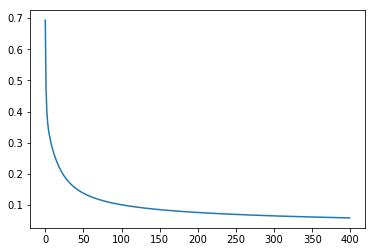

In [168]:
j, t = gradientDescent(X, y1, 400, theta, 0.1)
sns.lineplot(x=range(len(j)),y=j)

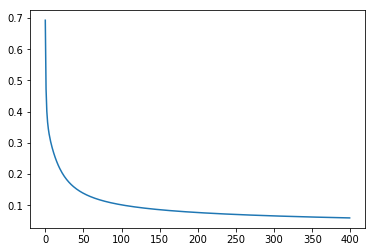

In [169]:
j, t = gradientDescentRegular(X, y1, 400, theta, 0.1, 3)
sns.lineplot(x=range(len(j)),y=j)

In [170]:
j_vals = []
t_vals = []
for i in range(10):
    y1 = np.matrix([0 if j!=i else 1 for j in list(y)]).reshape((m,1))
    j, t = gradientDescentRegular(X, y1, 400, theta, 0.1, 3)
    j_vals.append(j[-1])
    t_vals.append(t[-1])

Now, we have the models for all 10 classes. Lets see the predictions.

### Predictions

In [171]:
def predictValue(x):   #x is a 1d array-like structure of 400 values
    x = [1]+list(x)
    x = np.array(x).reshape((1, n))
    p = []
    for i in range(10):
        p.append(predict(x, t_vals[i]).item(0))
    prob = []
    for i in range(10):
        prob.append(round(p[i]*100,2))
    return prob, prob.index(max(prob))

0 = 0.49 %
1 = 88.37 %
2 = 10.68 %
3 = 4.41 %
4 = 3.37 %
5 = 1.79 %
6 = 1.63 %
7 = 5.95 %
8 = 9.07 %
9 = 2.45 %
The image is 1


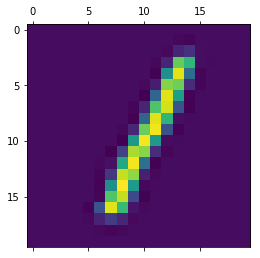

In [172]:
plt.matshow(mat['X'][793].reshape((20,20)).transpose())
prob, v = predictValue(mat['X'][793])
for i in range(10):
    print(i,'=',prob[i] ,'%')
    
print('The image is', v if prob[v]>50 else 'unclear' )

0 = 0.07 %
1 = 20.85 %
2 = 8.63 %
3 = 0.43 %
4 = 2.31 %
5 = 6.91 %
6 = 0.71 %
7 = 0.18 %
8 = 26.83 %
9 = 0.09 %
The image is unclear


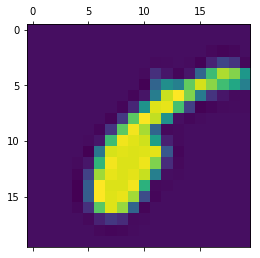

In [173]:
plt.matshow(mat['X'][3328].reshape((20,20)).transpose())
prob, v = predictValue(mat['X'][3328])
for i in range(10):
    print(i,'=',prob[i] ,'%')
    
print('The image is', v if prob[v]>50 else 'unclear' )

In [174]:
vals = []
for x in mat['X']:
    _, v = predictValue(x)
    vals.append(v)

In [175]:
actual = list(y.flat)
m = 0
for i in range(5000):
    if vals[i]==actual[i]: m+=1

In [176]:
print("Accuracy:",m/5000*100,"%")

Accuracy: 88.1 %


###### Expected accuracy is 95%. I'll work on this a bit more

## Ex 3 Part 2 Neural Network

We are already given the weights from a trained model with 400+1 units input layer, 25+1 in hidden layer and 10 output layers. As they are pre-trained, we only need to do forward propagation. We can use the same predict function as earlier as the hypothesis does not change

In [177]:
matw=scp.loadmat("ml coursera/ex3weights.mat")
matw.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [178]:
theta1 = matw['Theta1']
theta2 = matw['Theta2']

In [179]:
theta1.shape

(25, 401)

In [180]:
theta2.shape

(10, 26)

In [181]:
X = mat['X']
y = mat['y']
m = len(X)
X.shape

(5000, 400)

In [182]:
def predictAllValuesNN(x, theta1, theta2):
    x = np.c_[np.ones((m,1)), x]
    a1 = predict(x, theta1.T)
    a1 = np.c_[np.ones((m,1)), a1]
    a2 = predict(a1, theta2.T)
    return np.argmax(a2,axis=1)+1

In [183]:
predictions = predictAllValuesNN(X, theta1, theta2)

In [184]:
v = 0
for i in range(5000):
    if predictions[i]==y[i]: v+=1

In [185]:
print("Accuracy:",v/5000*100,"%")

Accuracy: 97.52 %


##### Expected accuracy. 

In [186]:
sum(theta)

matrix([[0.]])